# **Pendahuluan**

Pertama-tama dalam proyek ini saya menggunakan dataset yang diperoleh dari [kaggle](https://www.kaggle.com/) yaitu Emotions datasets for NLP dari link sebagai berikut : https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp/data

Data yang terdapat dari link tersebut kemudian saya olah lagi menggunakan python dan memberikan hasil data sebagai berikut yang sudah saya upload ke google drive : https://drive.google.com/file/d/1fSfIh1EaI-o9B0hIqGhCxb-8q5qZKyCk/view?usp=drive_link

Tujuan dari proyek ini adalah dapat membangun model NLP untuk mengetahui emosi berdasarkan teks pada data yang telah disediakan.

# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn
import matplotlib.pyplot as plt
import time
from tensorflow import keras
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense

In [2]:
# Mengambil dataset dari link google drive yang telah dijelaskan pada pendahuluan
# Untuk datasetnya sebelumnya sudah di share dan untuk mengambilnya dapat dilihat pada linknya diantara d/ dan sebelum /view

# Ganti 'your_file_id' dengan ID berkas Google Drive Anda
file_id = '1fSfIh1EaI-o9B0hIqGhCxb-8q5qZKyCk'

# URL untuk file CSV di Google Drive
url = f'https://drive.google.com/uc?id={file_id}'

# buat dataframenya dari url
df_emosi = pd.read_csv(url, names=['kalimat', 'ekspresi'], sep=';')
df_emosi

,kalimat,ekspresi
0,i feel he has been a terrific captain and hes ...,joy
1,i had a hard time focusing on my life and walk...,surprise
2,i just feeling needy,sadness
3,i feel groggy today and tired,sadness
4,i feel disgusted at him and at myself for havi...,anger
...,...,...
19994,i will give proper praise to the amish for bei...,anger
19995,im so stoned on endorphin that all i can feel ...,fear
19996,i go around people and i act normal but it fee...,surprise
19997,i got on and was nervous feeling very timid an...,fear


In [3]:
# melihat info dataframenya
df_emosi.info()

#dapat dilihat bahwa jumlah data ada sekitar 20.000 teks

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   kalimat   19999 non-null  object
 1   ekspresi  19999 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


In [4]:
# Menambahkan kolom 'Jumlah_Kata_Terpanjang' ke DataFrame yang berisi jumlah kata paling panjang setiap kalimat
df_emosi['Jumlah_Kata_Terpanjang'] = df_emosi['kalimat'].apply(lambda x: len(str(x).split()))

# Menemukan jumlah kata paling panjang
jumlah_kata_terpanjang = df_emosi['Jumlah_Kata_Terpanjang'].max()

# Menampilkan hasil
print("Jumlah kata paling panjang:", jumlah_kata_terpanjang)

Jumlah kata paling panjang: 66


In [5]:
# mengetahui data pada kolom ekspresi yang akan dijadikan label nantinya
df_emosi['ekspresi'].unique()

# diketahui ekspresi terbagi menjadi 6 macam

array(['joy', 'surprise', 'sadness', 'anger', 'fear', 'love'],
      dtype=object)

In [6]:
# lakukan one-hot encoding pada kolom ekspresi dan buat dataframe baru
categoryekspresi = pd.get_dummies(df_emosi.ekspresi)
dfemosi_baru = pd.concat([df_emosi, categoryekspresi], axis=1)
dfemosi_baru = dfemosi_baru.drop(columns='ekspresi')
dfemosi_baru

,kalimat,Jumlah_Kata_Terpanjang,anger,fear,joy,love,sadness,surprise
0,i feel he has been a terrific captain and hes ...,17,0,0,1,0,0,0
1,i had a hard time focusing on my life and walk...,16,0,0,0,0,0,1
2,i just feeling needy,4,0,0,0,0,1,0
3,i feel groggy today and tired,6,0,0,0,0,1,0
4,i feel disgusted at him and at myself for havi...,23,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
19994,i will give proper praise to the amish for bei...,36,1,0,0,0,0,0
19995,im so stoned on endorphin that all i can feel ...,18,0,1,0,0,0,0
19996,i go around people and i act normal but it fee...,12,0,0,0,0,0,1
19997,i got on and was nervous feeling very timid an...,26,0,1,0,0,0,0


In [7]:
# drop kolom yang tidak dibutuhkan seperti jumlah_kata_terpanjang
dfemosi_baru = dfemosi_baru.drop(columns='Jumlah_Kata_Terpanjang')

In [8]:
dfemosi_baru

,kalimat,anger,fear,joy,love,sadness,surprise
0,i feel he has been a terrific captain and hes ...,0,0,1,0,0,0
1,i had a hard time focusing on my life and walk...,0,0,0,0,0,1
2,i just feeling needy,0,0,0,0,1,0
3,i feel groggy today and tired,0,0,0,0,1,0
4,i feel disgusted at him and at myself for havi...,1,0,0,0,0,0
...,...,...,...,...,...,...,...
19994,i will give proper praise to the amish for bei...,1,0,0,0,0,0
19995,im so stoned on endorphin that all i can feel ...,0,1,0,0,0,0
19996,i go around people and i act normal but it fee...,0,0,0,0,0,1
19997,i got on and was nervous feeling very timid an...,0,1,0,0,0,0


In [9]:
# Ubah dataframe menjadi array
kalimatarray = dfemosi_baru['kalimat'].values
ekspresiarray = dfemosi_baru[['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']].values

In [10]:
kalimatarray

array(['i feel he has been a terrific captain and hes played very well for us taylor said',
       'i had a hard time focusing on my life and walked around feeling dazed and confused',
       'i just feeling needy', ...,
       'i go around people and i act normal but it feels strange',
       'i got on and was nervous feeling very timid and shy but after a while we were talking like weve known each other our whole lives',
       'i know he s feeling to me is sincere so i could tolerate these small trouble but i can t stand his this character in the performance of the sex life of husband and wife'],
      dtype=object)

In [11]:
ekspresiarray

array([[0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0]], dtype=uint8)

In [12]:
# bagi datanya menjadi data train dan data validation dimana persentase nya adalah 20%
kalimatarray_train, kalimatarray_val, ekspresiarray_train, ekspresiarray_val = train_test_split(kalimatarray, ekspresiarray, test_size=0.2)


In [13]:
# Mengetahui total data train dan validasi

print('total kalimat train : ', len(kalimatarray_train))
print('total kalimat val : ',len(kalimatarray_val))
print('total ekspresi train : ', len(ekspresiarray_train))
print('total ekspresi val : ',len(ekspresiarray_val))


total kalimat train :  15999
total kalimat val :  4000
total ekspresi train :  15999
total ekspresi val :  4000


In [14]:
# Lakukan tokenizer dan pad_sequence
tokenizerekspresi = Tokenizer(num_words=50000, oov_token='-')
tokenizerekspresi.fit_on_texts(kalimatarray_train)

sequence_train = tokenizerekspresi.texts_to_sequences(kalimatarray_train)
sequence_val = tokenizerekspresi.texts_to_sequences(kalimatarray_val)

paddedtrain_ekspresi = pad_sequences(sequence_train,
                                     padding='post',
                                     maxlen=100,
                                     truncating='post')

paddedval_ekspresi = pad_sequences(sequence_val,
                                     padding='post',
                                     maxlen=100,
                                     truncating='post')

In [15]:
print(tokenizerekspresi.word_index)

{'-': 1, 'i': 2, 'feel': 3, 'and': 4, 'to': 5, 'the': 6, 'a': 7, 'feeling': 8, 'that': 9, 'of': 10, 'my': 11, 'in': 12, 'it': 13, 'like': 14, 'so': 15, 'im': 16, 'for': 17, 'me': 18, 'have': 19, 'but': 20, 'was': 21, 'is': 22, 'am': 23, 'this': 24, 'with': 25, 'not': 26, 'about': 27, 'be': 28, 'on': 29, 'as': 30, 'you': 31, 'just': 32, 'at': 33, 'when': 34, 'or': 35, 'because': 36, 'all': 37, 'more': 38, 'do': 39, 'can': 40, 'really': 41, 't': 42, 'up': 43, 'by': 44, 'are': 45, 'very': 46, 'know': 47, 'been': 48, 'if': 49, 'out': 50, 'myself': 51, 'time': 52, 'how': 53, 'what': 54, 'little': 55, 'now': 56, 'had': 57, 'get': 58, 'from': 59, 'will': 60, 'being': 61, 'he': 62, 'they': 63, 'people': 64, 'would': 65, 'want': 66, 'them': 67, 'her': 68, 'one': 69, 'some': 70, 'who': 71, 'think': 72, 'ive': 73, 'still': 74, 'him': 75, 'an': 76, 'even': 77, 'life': 78, 'its': 79, 'bit': 80, 'we': 81, 'make': 82, 'much': 83, 'there': 84, 'something': 85, 's': 86, 'love': 87, 'things': 88, 'going

In [16]:
# buat arsitektur model dengan Embedding dan LSTM dengan input_dim = 50.000 ,output_dim = 200, dan input_length = 100
modelekspresi = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim = 50000, output_dim = 200, input_length=100),
    tf.keras.layers.LSTM(64, return_sequences=True, batch_input_shape=(128, 100, 200)),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')
])

modelekspresi.compile(loss='categorical_crossentropy',
                      optimizer='Adam',
                      metrics=['accuracy'])

In [17]:
# buat callback untuk mengetahui jika akurasi sesuai dengan yang ditentukan
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [18]:
# ujicoba model yang telah dibuat di atas
start = time.time()
historyekspresi = modelekspresi.fit(paddedtrain_ekspresi, ekspresiarray_train, epochs=50,
                                    validation_data=(paddedval_ekspresi,ekspresiarray_val), verbose=2, callbacks=[callbacks])
stop = time.time()
print(f"Lama Waktu Training yang Dibutuhkan: {round((stop - start)/60)}minute")

Epoch 1/50
500/500 - 37s - loss: 1.5852 - accuracy: 0.3285 - val_loss: 1.5665 - val_accuracy: 0.3385 - 37s/epoch - 74ms/step
Epoch 2/50
500/500 - 9s - loss: 1.5761 - accuracy: 0.3291 - val_loss: 1.5800 - val_accuracy: 0.3385 - 9s/epoch - 18ms/step
Epoch 3/50
500/500 - 6s - loss: 1.4815 - accuracy: 0.3458 - val_loss: 1.2491 - val_accuracy: 0.4092 - 6s/epoch - 11ms/step
Epoch 4/50
500/500 - 6s - loss: 1.1519 - accuracy: 0.4222 - val_loss: 1.1299 - val_accuracy: 0.4325 - 6s/epoch - 13ms/step
Epoch 5/50
500/500 - 5s - loss: 1.0268 - accuracy: 0.4488 - val_loss: 1.0760 - val_accuracy: 0.4608 - 5s/epoch - 11ms/step
Epoch 6/50
500/500 - 6s - loss: 0.9039 - accuracy: 0.5018 - val_loss: 0.9885 - val_accuracy: 0.4905 - 6s/epoch - 12ms/step
Epoch 7/50
500/500 - 5s - loss: 0.8201 - accuracy: 0.5254 - val_loss: 0.9069 - val_accuracy: 0.5235 - 5s/epoch - 9ms/step
Epoch 8/50
500/500 - 5s - loss: 0.6767 - accuracy: 0.6638 - val_loss: 0.6432 - val_accuracy: 0.8173 - 5s/epoch - 10ms/step
Epoch 9/50
500/

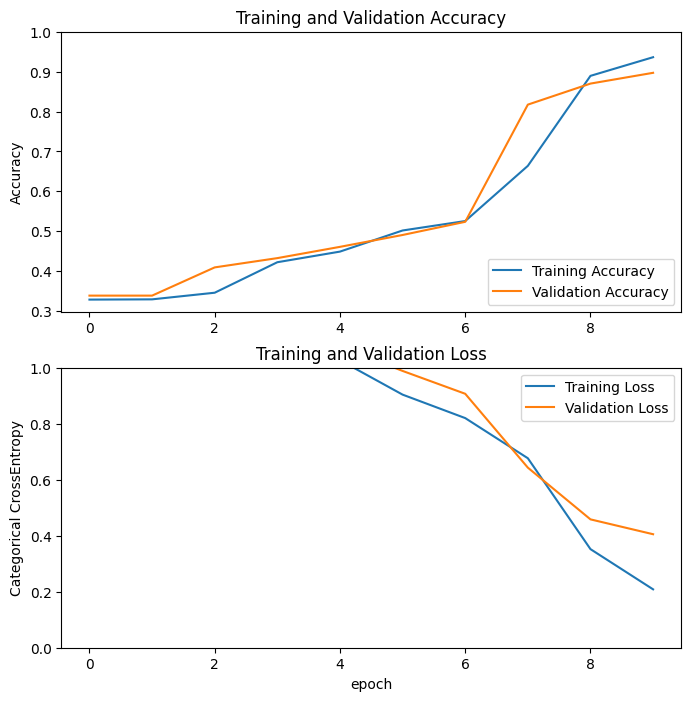

In [19]:
# Buat Grafik Untuk Mengetahui akurasi model yang telah dilatih dengan matplotlib

acc = historyekspresi.history['accuracy']
val_acc = historyekspresi.history['val_accuracy']

loss = historyekspresi.history['loss']
val_loss = historyekspresi.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Categorical CrossEntropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()